<a href="https://colab.research.google.com/github/mgsainyinyitun/spectral_clustering/blob/main/spectral_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load And Clean Data

In [ ]:
X = pd.read_csv('CC GENERAL.csv')

In [ ]:
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
X = X.drop('CUST_ID',axis = 1)

In [ ]:
X.fillna(method='ffill',inplace=True)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Preprocessing the data to make the data visualizable

In [ ]:
# Scaling the Data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [ ]:
# Normalizing the Data
X_normalized = normalize(X_scaled)

# And convert numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


In [ ]:
# Reducing the dimensions of the data
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2']

X_principal.head()

,P1,P2
0,-0.489949,-0.679975
1,-0.519099,0.544832
2,0.330633,0.268876
3,-0.481657,-0.097605
4,-0.563512,-0.482506


# Building the Clustering models and Visualizing the clustering (affinity='rbf')

In [ ]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters=2,affinity='rbf')

# Traing the model and storing the predicted cluster labels

labels_rbf = spectral_model_rbf.fit_predict(X_principal)

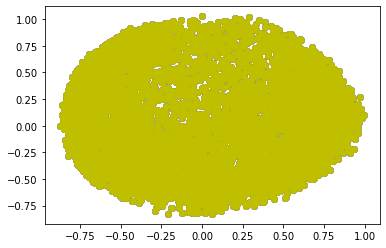

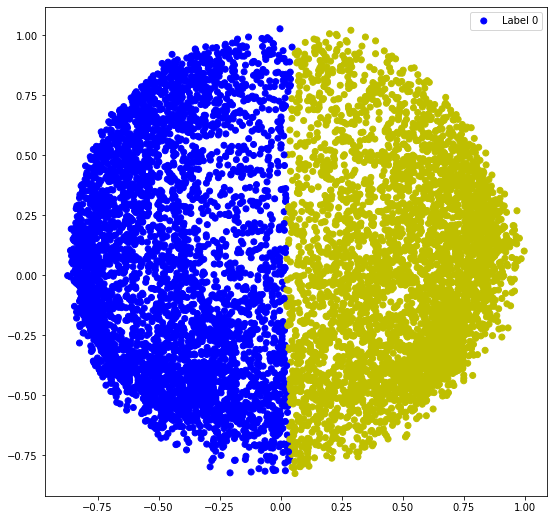

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'

# building the colour vector for data point
cvec = [colours[label] for label in labels_rbf]

# plotting the clustered scatter plot

b = plt.scatter(X_principal['P1'],X_principal['P2'],color='b');
y = plt.scatter(X_principal['P1'],X_principal['P2'],color='y');

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'],X_principal['P2'],c=cvec)
plt.legend(('Label 0','Label 1'))
plt.show()

# Affinity = 'nearest_neighbors'

In [ ]:
# Build model
spectral_model_nn = SpectralClustering(n_clusters=2,affinity='nearest_neighbors')

# train the model
labels_nn = spectral_model_nn.fit_predict(X_principal)

# Evaluation the Performance

In [ ]:
# list of diff val of aff
affinity = ['rbf','nearest-neighbours']
s_scores = []

# Evaluating 
s_scores.append(silhouette_score(X,labels_rbf))
s_scores.append(silhouette_score(X,labels_nn))

print(s_scores)

[0.05300611480757429, 0.05667039590382262]


# Compare the performance

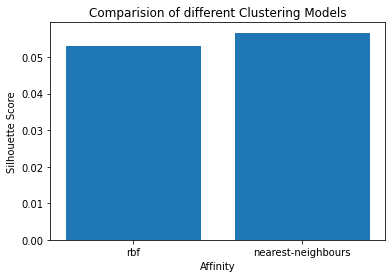

In [ ]:
# Plotting a Bar Graph to compare the models

plt.bar(affinity,s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparision of different Clustering Models')
plt.show()